In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [21]:
IMAGE_SIZE = 294 
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [22]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "SelectedSkin",
    shuffle=True, #shuffle through batch for random images
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 8794 files belonging to 5 classes.


In [23]:
class_names = dataset.class_names
class_names

['1. Eczema 1677',
 '10. Warts Molluscum and other Viral Infections - 2103',
 '3. Atopic Dermatitis - 1.25k',
 '7. Psoriasis pictures Lichen Planus and related diseases - 2k',
 '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']

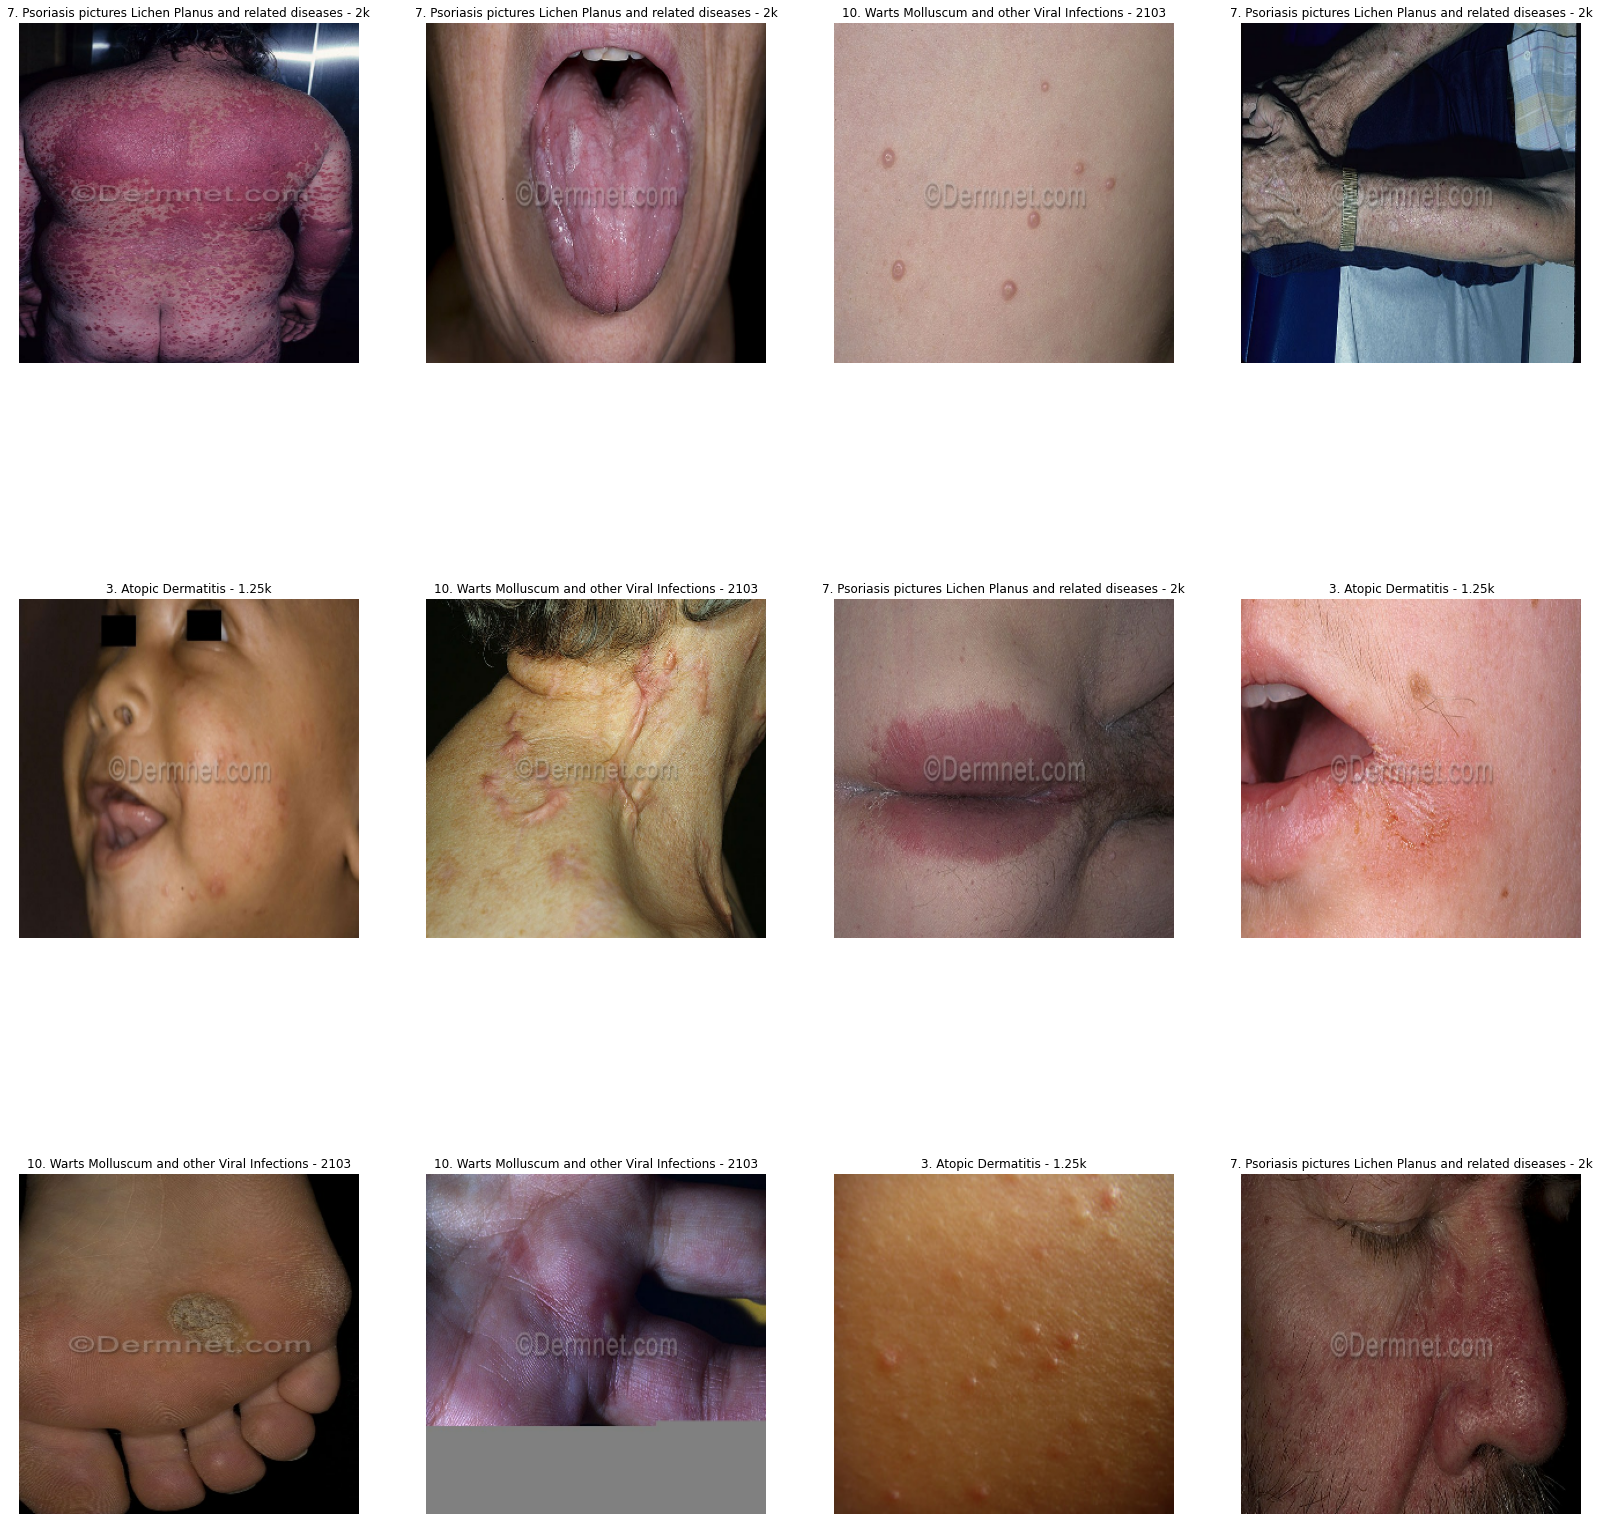

In [46]:
plt.figure(figsize=(28, 30))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off") #visualize image mat lab, imshow=3D array, this prints first image
    #print(image_batch[0].shape) #first image
    #print(label_batch.numpy()) #numpy shows color value
    #print(image_batch[0]) #batch is the group
    #print(image_batch[0].numpy())

In [47]:
len(dataset) #split dataset into training set

275

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test #after each epoch you do validation on the 10% and measure accuracy of model after every epoch


In [48]:
train_size = 0.8
len(dataset)*train_size #length of dataset is 275

220.0

In [49]:
train_ds= dataset.take(220) #takes first 220 batches where each batch is 32 which is 80% of 275
len(train_ds)

220

In [50]:
test_ds = dataset.skip(220) #skips first 220
len(test_ds)

55

In [51]:
val_size=0.1
len(dataset)*val_size

27.5

In [52]:
val_ds = test_ds.take(27)
len(val_ds)

27

In [53]:
test_ds = test_ds.skip(6)
len(test_ds)

49

In [55]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    
    train_ds = ds.take(train_size)
    
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [56]:
len(train_ds)

220

In [57]:
len(val_ds)

27

In [58]:
len(test_ds)

49

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [59]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

#Start of CNN

In [61]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), #normalizes probability of classes
])
model.build(input_shape=input_shape)

NameError: name 'resize_and_rescale' is not defined